In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


# Load the dataset
df = pd.read_csv('upwork_dataset.csv')
df = pd.DataFrame(df)

print(df.shape)
df

(63950, 42)


,Job Title,Job_URL,EX_level_demand,Time_Limitation,Search_Keyword,Posted_from,Description,Category1_URL_search,Category_1,highlight,...,Connects_Num,New_Connects_Num,Rating,Feedback_Num,Payment_type,Job_Cost,Hourly_Rate,Start_rate,End_rate,ISO_Code
0,Power bi specialist freelance,https://www.upwork.com/jobs/Power-specialist-f...,Expert,NaN,Data_science,5 minutes ago,Already data pooled and designed. Need to refi...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,data,...,6.0,12.0,NaN,0.0,Fixed-price,"$2,500",NaN,0,NaN,USA
1,Case Study (on-demand delivery startup),https://www.upwork.com/jobs/Case-Study-demand-...,Intermediate,NaN,Data_science,5 minutes ago,"Hi,\n\nWould you be able to help me do a case-...",https://www.upwork.com/nx/jobs/search/?ontolog...,Google Data Studio,Google Data Studio,...,4.0,8.0,5.000000,1.0,Fixed-price,$200,NaN,0,NaN,CAN
2,"File Maker Pro Reports, Charts, Query and Ongo...",https://www.upwork.com/jobs/File-Maker-Pro-Rep...,Intermediate,"3 to 6 months, Less than 30 hrs/week",Data_science,9 minutes ago,NITIAL PROJECT\n\nSet up Monthly Report mimick...,https://www.upwork.com/nx/jobs/search/?ontolog...,Report Writing,NaN,...,6.0,12.0,5.000000,1.0,Hourly,NaN,$40.00,40,NaN,USA
3,Implementation of EleutherAI/gpt-neox-20b,https://www.upwork.com/jobs/Implementation-Ele...,Expert,"3 to 6 months, Less than 30 hrs/week",Data_science,12 minutes ago,"As a first step, you will implement the instal...",https://www.upwork.com/nx/jobs/search/?ontolog...,Machine Learning Model,NaN,...,6.0,12.0,4.935536,26.0,Hourly,NaN,$35.00-$100.00,$35.00,$100.00,CAN
4,BI and Data Engineer for Upwork Finance System...,https://www.upwork.com/jobs/and-span-Data-span...,Expert,"More than 6 months, 30+ hrs/week",Data_science,14 minutes ago,The Upwork Finance Systems team is looking for...,https://www.upwork.com/nx/jobs/search/?ontolog...,Data Analysis,Data,...,6.0,12.0,4.942242,12512.0,Hourly,NaN,NaN,0,NaN,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63945,(Commission Based) Cold Caller Needed,https://www.upwork.com/jobs/Commission-Based-C...,Expert,"More than 6 months, 30+ hrs/week",Marketing,3 days ago,About the role:\n\nWe are seeking a motivated ...,https://www.upwork.com/nx/jobs/search/?ontolog...,Cold Calling,Marketing,...,4.0,8.0,4.756932,29.0,Hourly,NaN,NaN,0,NaN,SGP
63946,High-Performance *Ecom Email* Copywriter Suppl...,https://www.upwork.com/jobs/High-Performance-E...,Expert,"More than 6 months, 30+ hrs/week",Marketing,3 days ago,We are seeking a talented and motivated Copywr...,https://www.upwork.com/nx/jobs/search/?ontolog...,Email Copywriting,Marketing,...,6.0,12.0,4.666868,42.0,Hourly,NaN,NaN,0,NaN,USA
63947,TikTok profile managment Hungary,https://www.upwork.com/jobs/TikTok-profile-man...,Entry level,"1 to 3 months, Less than 30 hrs/week",Marketing,3 days ago,We are searching for someone who could help us...,https://www.upwork.com/nx/jobs/search/?ontolog...,Social Media Marketing,Social Media Marketing,...,6.0,12.0,NaN,0.0,Hourly,NaN,NaN,0,NaN,SVN
63948,Creating videos (including UGC) for TikTok - A...,https://www.upwork.com/jobs/Creating-videos-in...,Intermediate,NaN,Marketing,3 days ago,"Hello there,\nWe are interested in creating so...",https://www.upwork.com/nx/jobs/search/?ontolog...,Social Media Marketing,Social Media Marketing,...,4.0,8.0,4.979751,113.0,Fixed-price,NaN,NaN,0,NaN,ISR


In [183]:
# Drop unnecessary columns
print(df.columns)

df_clean = df.drop(["Job_URL",
                    "Posted_from",
                    "Description",
                    "Category1_URL_search",
                    "Category2_URL_search",
                    "Category3_URL_search",
                    "Category4_URL_search",
                    "Category5_URL_search",
                    "Category6_URL_search",
                    "Category7_URL_search",
                    "Category8_URL_search",
                    "Category9_URL_search",
                    "Category_4",
                    "Category_5",
                    "Category_6",
                    "Category_7",
                    "Category_8",
                    "Category_9",
                    "Payment_Situation",
                    "Job Title",
                    "Hourly_Rate",
                    "Connects_Num",
                    "New_Connects_Num",
                    "Freelancers_Num",
                    "highlight",
                    "Start_rate",
                    "End_rate"], axis=1)

print(df_clean.columns)

Index(['Job Title', 'Job_URL', 'EX_level_demand', 'Time_Limitation',
       'Search_Keyword', 'Posted_from', 'Description', 'Category1_URL_search',
       'Category_1', 'highlight', 'Category2_URL_search', 'Category_2',
       'Category3_URL_search', 'Category_3', 'Category4_URL_search',
       'Category_4', 'Category5_URL_search', 'Category_5',
       'Category6_URL_search', 'Category_6', 'Category7_URL_search',
       'Category_7', 'Category8_URL_search', 'Category_8',
       'Category9_URL_search', 'Category_9', 'Applicants_Num',
       'Payment_Situation', 'Enterprise_Client', 'Freelancers_Num', 'Spent($)',
       'Client_Country', 'Connects_Num', 'New_Connects_Num', 'Rating',
       'Feedback_Num', 'Payment_type', 'Job_Cost', 'Hourly_Rate', 'Start_rate',
       'End_rate', 'ISO_Code'],
      dtype='object')
Index(['EX_level_demand', 'Time_Limitation', 'Search_Keyword', 'Category_1',
       'Category_2', 'Category_3', 'Applicants_Num', 'Enterprise_Client',
       'Spent($)', 'Clien

## EDA + Cleaning and Normalization

In [ ]:
# Cleaning and normalizing Time Limitation column

df_clean.Time_Limitation.unique()

# Normalize the "Time_Limitation" column
df_clean['Time_Limitation'] = df_clean['Time_Limitation'].replace({
    '3 to 6 months, Less than 30 hrs/week': "3-6",
       'More than 6 months, 30+ hrs/week': "6+",
       '1 to 3 months, Less than 30 hrs/week': "1-3",
       'More than 6 months, Hours to be determined': "6+",
       'Less than 1 month, Less than 30 hrs/week': "0-1",
       'More than 6 months, Less than 30 hrs/week': "6+",
       'Less than 1 month, not_sure': "0-1",
       'Less than 1 month, Hours to be determined': "0-1",
       '3 to 6 months, Hours to be determined': "3-6",
       '3 to 6 months, 30+ hrs/week': "3-6",
        'More than 6 months, not_sure': "6+",
       '1 to 3 months, not_sure': "1-3",
         'Less than 1 month, 30+ hrs/week': "0-1",
       '1 to 3 months, Hours to be determined': "1-3",
       '1 to 3 months, 30+ hrs/week': "1-3",
         '3 to 6 months, not_sure': "3-6",
})


# Replace Nan Values in Time Limitation 
df_clean['Time_Limitation'].fillna('No Limit', inplace=True)

df_clean['Time_Limitation'].unique()

/var/folders/y4/ldlkp8h13vq4dx3xc5sbxrr00000gn/T/ipykernel_22959/1131117959.py:27: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





array(['No Limit', '3-6', '6+', '1-3', '0-1'], dtype=object)

In [ ]:
# Normalize the "Enterprise_Client" column
df_clean.Enterprise_Client.unique()
df_clean.Enterprise_Client.fillna("Individual", inplace=True)

# Normalize the "Applicants_Num" column to numeric values
df_clean.Applicants_Num.unique()
df_clean.Applicants_Num.replace({"Less than 5": 5,
                                "50+": 50,
                                "5 to 10": 7,
                                "10 to 15": 12,
                                "15 to 20": 17,
                                "20 to 50": 35}, inplace=True)

# Edit job categories
df_clean['Search_Keyword'].replace({"Data_science": "Data Science"}, inplace=True)

df_clean.loc[(df_clean["Category_1"] == "Python") & (df_clean["Search_Keyword"] == "Data Science"), "Category_1"] = "Python for Data Science"

/var/folders/y4/ldlkp8h13vq4dx3xc5sbxrr00000gn/T/ipykernel_22959/224125188.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/y4/ldlkp8h13vq4dx3xc5sbxrr00000gn/T/ipykernel_22959/224125188.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [186]:
# Handle duplicate categories

# Identify categories that appear in multiple search keywords
duplicates = df_clean.groupby('Category_1')['Search_Keyword'].unique()
duplicate_categories = duplicates[duplicates.apply(len) > 1]

print(duplicate_categories)

# For each duplicate category, keep the most frequent search keyword and update others
for category in duplicate_categories.index:
    # Get all search keywords for this category
    search_keywords = df_clean[df_clean['Category_1'] == category]['Search_Keyword'].value_counts()
    
    # The most common search keyword will be kept
    primary_keyword = search_keywords.index[0]
    
    # Update all other occurrences to use the primary keyword
    mask = (df_clean['Category_1'] == category) & (df_clean['Search_Keyword'] != primary_keyword)
    df_clean.loc[mask, 'Search_Keyword'] = primary_keyword

# Verify the changes
remaining_duplicates = df_clean.groupby('Category_1')['Search_Keyword'].nunique()
print("\nRemaining categories with multiple search keywords:")
print(remaining_duplicates[remaining_duplicates > 1])

Category_1
2D Animation                     [3D, Marketing]
3D Animation                     [3D, Developer]
3D Modeling        [Data Science, 3D, Developer]
3D Rendering                     [3D, Developer]
A/B Testing            [Data Science, Marketing]
                               ...              
eBay Listing              [Developer, Marketing]
eBay Marketing            [Developer, Marketing]
iOS                [Data Science, 3D, Developer]
iOS Development           [Developer, Marketing]
three.js                         [3D, Developer]
Name: Search_Keyword, Length: 532, dtype: object

Remaining categories with multiple search keywords:
Series([], Name: Search_Keyword, dtype: int64)


In [ ]:
# Replace NaN values in the "Rating" column with the mean rating
rating_mean = df_clean.Rating.mean()
df_clean.Rating.fillna(rating_mean, inplace=True)

print(df_clean.Rating.isna().sum())

0


/var/folders/y4/ldlkp8h13vq4dx3xc5sbxrr00000gn/T/ipykernel_22959/537563024.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df_clean['Payment_type'].fillna("Unknown", inplace=True)

# Drop rows where 'Payment_type' is 'Unknown'
df_clean = df_clean.loc[df_clean['Payment_type'] != 'Unknown']

spending_mean = df_clean['Spent($)'].mean()
df_clean["Spent($)"].fillna(spending_mean, inplace=True)

# Replace NaN values in the expertise column
df_clean["EX_level_demand"].fillna(df_clean["EX_level_demand"].mode()[0], inplace=True)

/var/folders/y4/ldlkp8h13vq4dx3xc5sbxrr00000gn/T/ipykernel_22959/3506772949.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/y4/ldlkp8h13vq4dx3xc5sbxrr00000gn/T/ipykernel_22959/3506772949.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
# Average out and clean hourly rates
# Remove the dollar sign and convert to numeric

# Remove dollar signs and convert to numeric values
df['Start_rate'] = df['Start_rate'].astype(str).str.replace('$', '').astype(float)
df['End_rate'] = df['End_rate'].astype(str).str.replace('$', '').astype(float)
df["Job_Cost"] = df["Job_Cost"].astype(str).str.replace('$', '').str.replace(',', '').str.strip().astype(float)


# Calculate the average rate
df_clean['Hourly_rate'] = (df['Start_rate'] + df['End_rate']) / 2
df_clean['Hourly_rate'].fillna(df['Start_rate'], inplace=True)

/var/folders/y4/ldlkp8h13vq4dx3xc5sbxrr00000gn/T/ipykernel_22959/436575110.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [190]:
# Where Payment_type is fixed-price, set the hourly rate to NaN
df_clean.loc[df_clean['Payment_type'] == 'Fixed-price', 'Hourly_rate'] = np.nan

# Where Hourly rate is 0, set it to mean hourly rate
mean_hourly_rate = df_clean['Hourly_rate'].mean()
df_clean.loc[df_clean['Hourly_rate'] == 0, 'Hourly_rate'] = mean_hourly_rate

print(df_clean.shape)

# Drop columns where Job_Cost is NaN AND hourly rate is NaN
df_clean = df_clean.dropna(subset=['Job_Cost', 'Hourly_rate'], how='all')

print(df_clean.shape)

(63949, 16)
(60446, 16)


## Outlier Handling

Outliers assessed by defining the interquantile range.
Any values outside of this range vere capped (replaced with either upper or lower limit)

Number of outliers: Applicants_Num       0
Spent($)          9898
Rating            3577
Feedback_Num      9259
Hourly_rate       5032
dtype: int64
Number of outliers after cleaning: Applicants_Num    0
Spent($)          0
Rating            0
Feedback_Num      0
Hourly_rate       0
dtype: int64


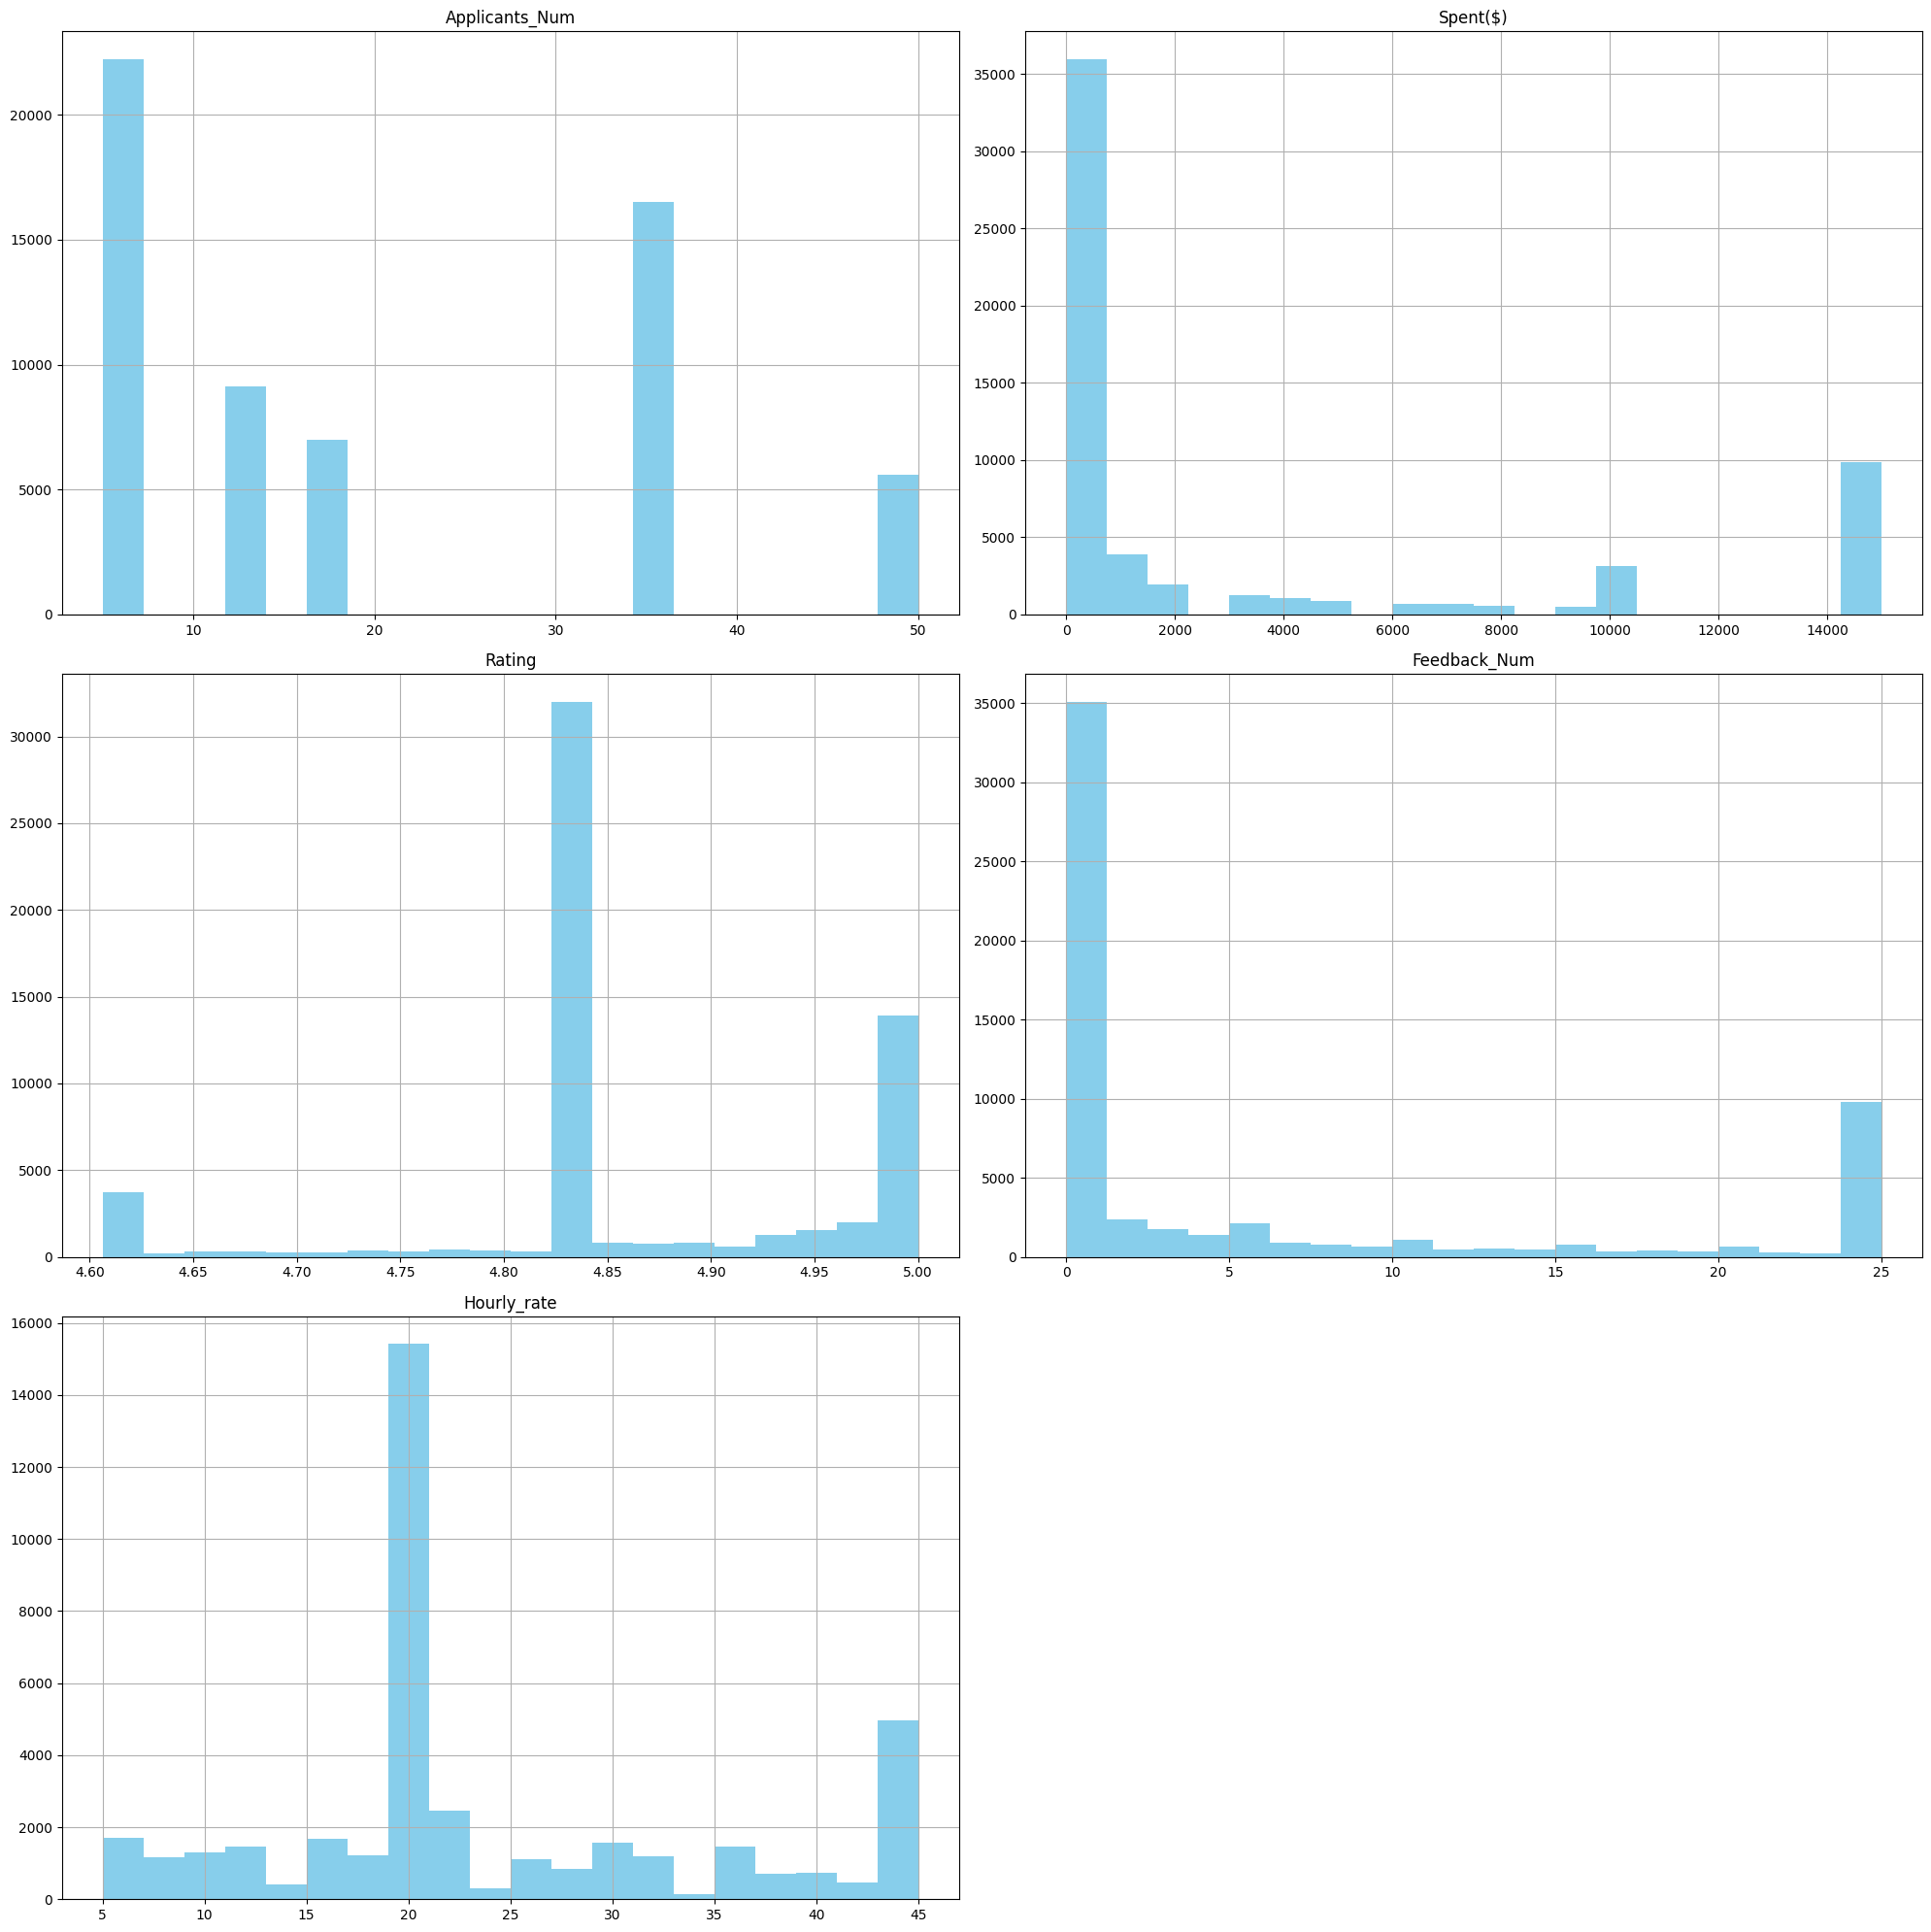

In [191]:
# Save numerical columns into a separate dataframe
numerical_values = df_clean.select_dtypes(include=[np.number])

# Detect outliers using the IQR method
Q1 = numerical_values.quantile(0.25)
Q3 = numerical_values.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Number of outliers: {((numerical_values < lower_limit) | (numerical_values > upper_limit)).sum()}")

# Capping outliers
df_capped = numerical_values
for col in numerical_values.columns:
    df_capped[col] = numerical_values[col].clip(lower=lower_limit[col], upper=upper_limit[col])

print(f"Number of outliers after cleaning: {((df_capped > upper_limit) | (df_capped < lower_limit)).sum()}")

df_capped.hist(
    figsize=(20, 20),
    bins=20,
    color='skyblue',
    ec='black'
)

plt.tight_layout()
plt.show()

non_numerical = df_clean.select_dtypes(exclude=[np.number])

# Merge numerical and non-numerical dataframes
df_clean = pd.concat([df_capped, non_numerical], axis=1)

# Save cleaned dataframe
df_clean.to_csv('upwork_clean.csv', index=False)